In [92]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import devkit.api as dk

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [54]:
df_hs300 = pd.read_csv(r"C:\projects\quant\data\hs300.csv")

In [25]:
df_hs300.head()

,date,pre_close,open,high,low,close,volume,amt
0,2005-01-05,982.794,981.577,997.323,979.877,992.564,711910898.0,4.529208e+09
1,2005-01-06,992.564,993.331,993.788,980.330,983.174,628802905.0,3.921015e+09
2,2005-01-07,983.174,983.045,995.711,979.812,983.958,729869409.0,4.737469e+09
3,2005-01-10,983.958,983.760,993.959,979.789,993.879,579169799.0,3.762933e+09
4,2005-01-11,993.879,994.189,999.554,991.092,997.135,584907998.0,3.704077e+09


In [55]:
df_hs300['date'] = df_hs300['date'].apply(lambda x: dk.char2datetime(x))

In [70]:
df_hs300_used = df_hs300[['date', 'close', 'pre_close']].copy()

In [71]:
df_hs300_used['daily_ret'] = df_hs300_used['close'] / df_hs300_used['pre_close']
date_list = df_hs300_used['date'].tolist()
df_hs300_used = df_hs300_used.set_index(['date'])

In [86]:
df_hs300_used_sub

,close,pre_close,daily_ret
date,,,
2005-01-05,992.564,982.794,1.000000
2005-01-06,983.174,992.564,0.990540
2005-01-07,983.958,983.174,1.000797
2005-01-10,993.879,983.958,1.010083
2005-01-11,997.135,993.879,1.003276
2005-01-12,996.748,997.135,0.999612
2005-01-13,996.877,996.748,1.000129
2005-01-14,988.306,996.877,0.991402
2005-01-17,967.452,988.306,0.978899


In [97]:
# 简单持有　到期卖出
hold_periods = 5
ret_lib = {}
for date_st in date_list[: -200]: 
    date_end = date_st + dk.timedelta({'years': hold_periods})
    conds = (df_hs300_used.index >= date_st) & (df_hs300_used.index <= date_end)
    df_hs300_used_sub = df_hs300_used[conds].copy()
    df_hs300_used_sub.loc[date_st, 'daily_ret'] = 1.0
    df_hs300_used_sub['net_value'] = df_hs300_used_sub['daily_ret'].cumprod()
    ret_lib[date_st] = df_hs300_used_sub.iloc[-1, -1]
df_ret_lib = pd.Series(ret_lib)
df_ret_lib.hist()

In [104]:
list(df_hs300_used_sub.columns).index('daily_ret')

2

In [98]:
# 止损止盈　波段操作
hold_periods = 5
stop_loss = 0.1
stop_profit = 0.05
ret_lib = {}
for date_st in date_list[: -200]: 
    date_end = date_st + dk.timedelta({'years': hold_periods})
    conds = (df_hs300_used.index >= date_st) & (df_hs300_used.index <= date_end)
    df_hs300_used_sub = df_hs300_used[conds].copy()
    df_hs300_used_sub['net_value'] = np.nan
    ix_ret = list(df_hs300_used_sub.columns).index('daily_ret')
    ix_nv = list(df_hs300_used_sub.columns).index('net_value')
    for i in range(df_hs300_used_sub.shape[0]):
        if i == 0:
            df_hs300_used_sub.iloc[i, ix_nv] = 1.0
        else:
            df_hs300_used_sub.iloc[i, ix_nv] = df_hs300_used_sub.iloc[i-1, ix_nv] * df_hs300_used_sub.iloc[i, ix_ret]
            if df_hs300_used_sub.iloc[i, ix_nv] < 1 - stop_loss:
                
    
    df_hs300_used_sub['net_value'] = df_hs300_used_sub['daily_ret'].cumprod()
    ret_lib[date_st] = df_hs300_used_sub.iloc[-1, -1]
df_ret_lib = pd.Series(ret_lib)
df_ret_lib.hist()

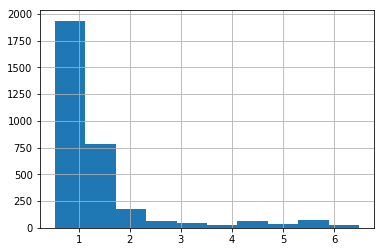

In [74]:
ret_lib = {}
ret_lib[date_st] = df_hs300_used_sub.loc[date_end, 'net_value']

,close,pre_close,daily_ret,net_value
date,,,,
2005-01-05,992.564,982.794,1.000000,1.000000
2005-01-06,983.174,992.564,0.990540,0.990540
2005-01-07,983.958,983.174,1.000797,0.991330
2005-01-10,993.879,983.958,1.010083,1.001325
2005-01-11,997.135,993.879,1.003276,1.004605
2005-01-12,996.748,997.135,0.999612,1.004215
2005-01-13,996.877,996.748,1.000129,1.004345
2005-01-14,988.306,996.877,0.991402,0.995710
2005-01-17,967.452,988.306,0.978899,0.974700
